In [2]:
import io
import pandas as pd
from IPython.display import Image
from google.cloud import vision
from PIL import Image as PILImage, ImageDraw, ImageFont

# Detecting entities using Vision

This notebooks shows how you can use the Google Cloud Vision API to detect *entities* in images. Entities people and things that are semantically meaningful.

We'll use the Google Cloud Client Library for Vision to perform landmark detection on some public domain images.

## Who's in this picture?

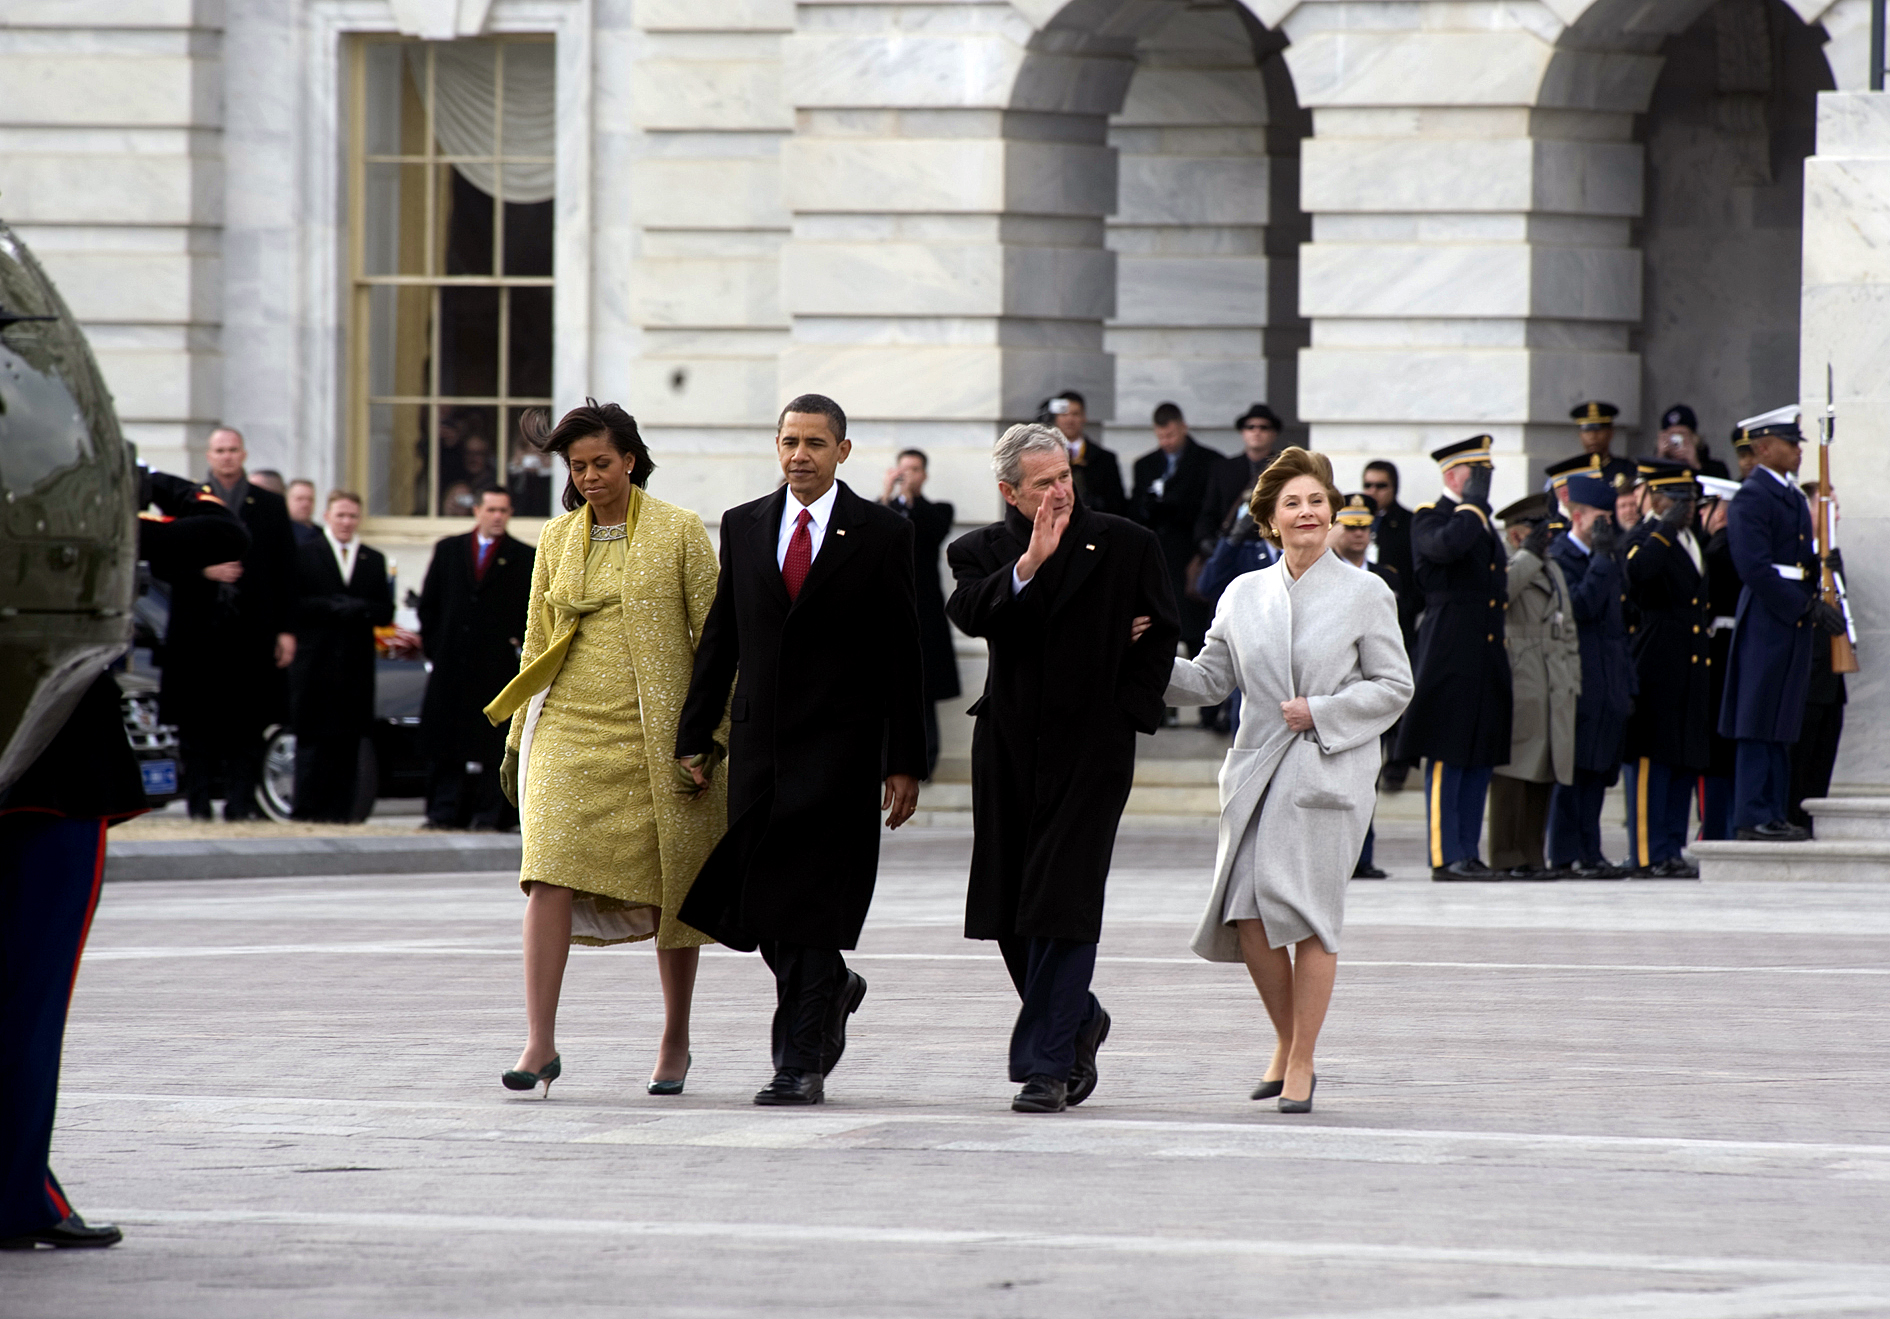

In [3]:
kermit_picture = open('data/importantpeople.jpg', 'rb').read()

# Display our picture
Image(kermit_picture, width=800)

In [4]:
client = vision.ImageAnnotatorClient()

In [5]:
response = client.web_detection(image=vision.types.Image(content=kermit_picture))
response

web_detection {
  web_entities {
    entity_id: "/m/09b6zr"
    score: 10.76099967956543
    description: "George W. Bush"
  }
  web_entities {
    entity_id: "/m/02mjmr"
    score: 10.718999862670898
    description: "Barack Obama"
  }
  web_entities {
    entity_id: "/m/04g8d"
    score: 10.649999618530273
    description: "Laura Bush"
  }
  web_entities {
    entity_id: "/m/057l6lw"
    score: 1.163580060005188
    description: "Barack Obama 2009 presidential inauguration"
  }
  web_entities {
    entity_id: "/m/025s5v9"
    score: 1.0539000034332275
    description: "Michelle Obama"
  }
  web_entities {
    entity_id: "/m/034ls"
    score: 1.006500005722046
    description: "George H. W. Bush"
  }
  web_entities {
    entity_id: "/m/07vth"
    score: 0.8649300932884216
    description: "United States Capitol"
  }
  web_entities {
    entity_id: "/m/05bryps"
    score: 0.8507400751113892
    description: "George W. Bush 2001 presidential inauguration"
  }
  web_entities {
    entity

## Visualize the data

In [11]:
response.web_detection.best_guess_labels

[label: "obamas and bushes"
language_code: "en"
]

In [29]:
def print_entities(response):
    entities = [(entity.description, entity.score) for entity in response.web_detection.web_entities]
    return pd.DataFrame(entities, columns=['entity', 'score'])

In [30]:
print_entities(response)

entity      score
0                                 George W. Bush  10.788000
1                                   Barack Obama  10.728001
2                                     Laura Bush  10.663500
3    Barack Obama 2009 presidential inauguration   1.160280
4                                 Michelle Obama   1.052850
5                               Barack Obama Sr.   0.949350
6  George W. Bush 2001 presidential inauguration   0.864270
7                          United States Capitol   0.798765
8                 President of the United States   0.707000
9                                                  0.703400

## How about similar images?

In [37]:
def print_similar_images(response):
    for image in response.web_detection.visually_similar_images:
        display(Image(image.url.split('?')[0], width=600))

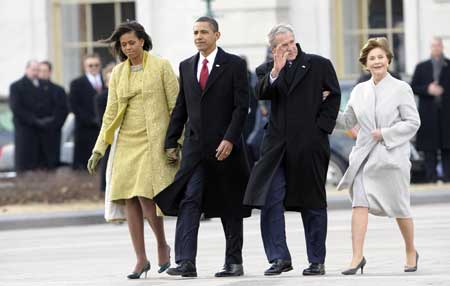

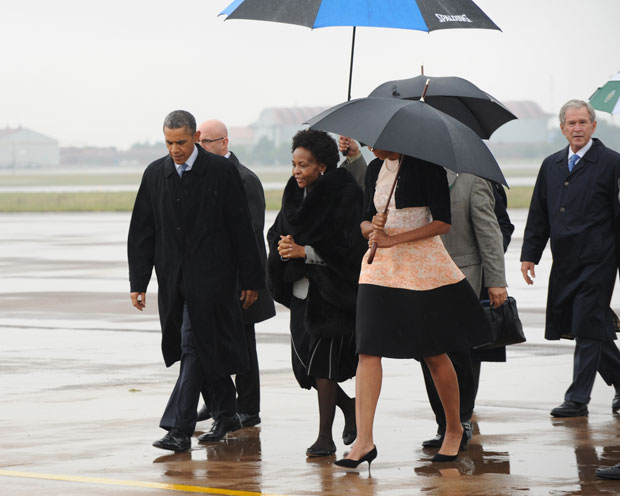

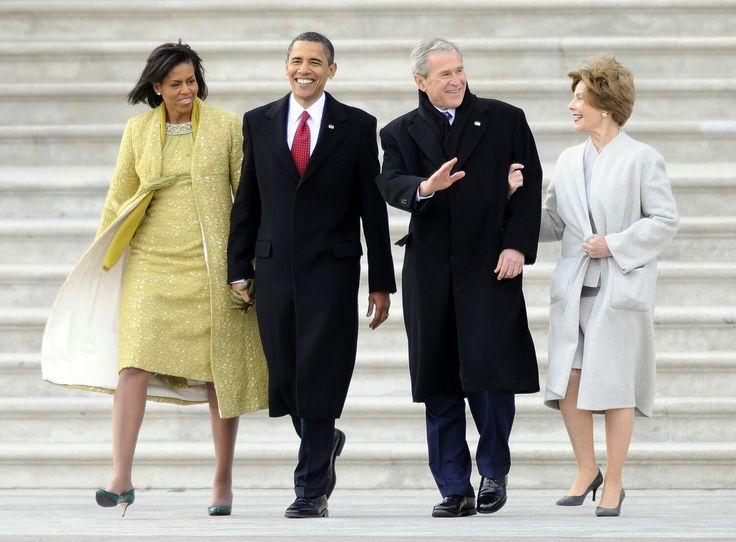

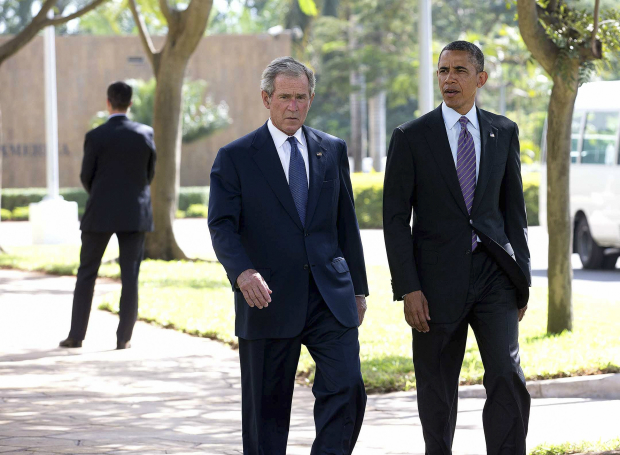

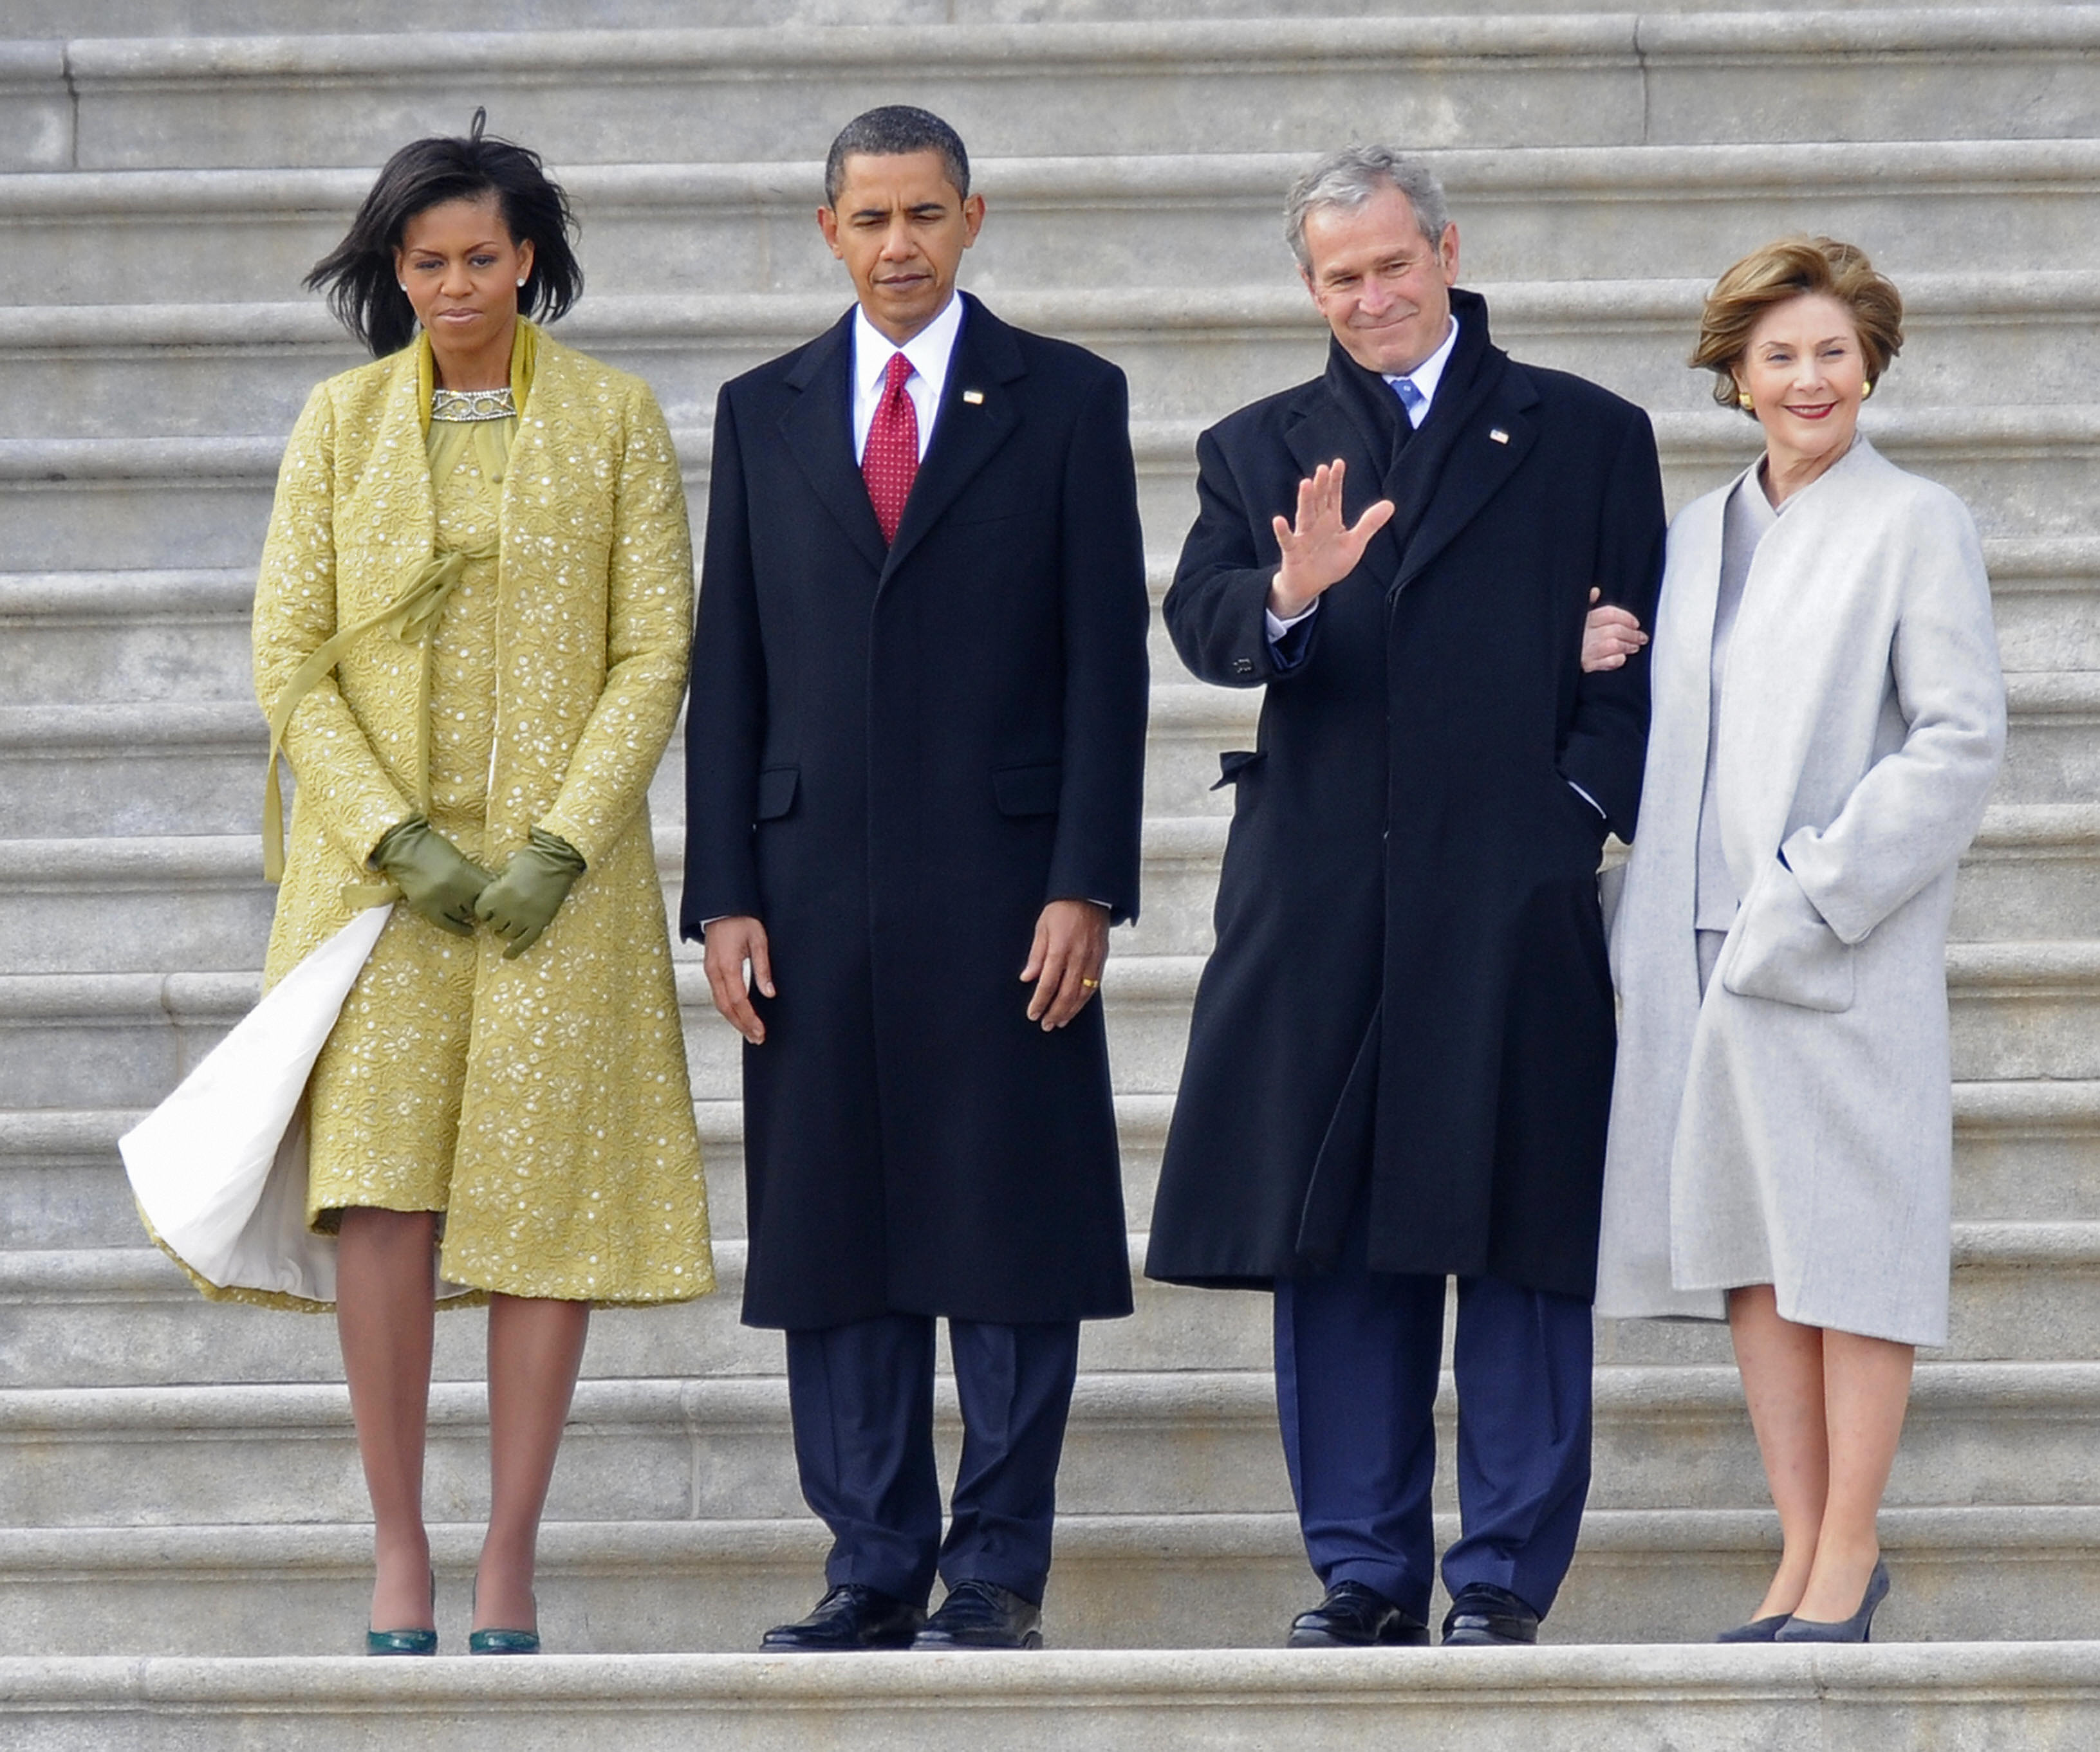

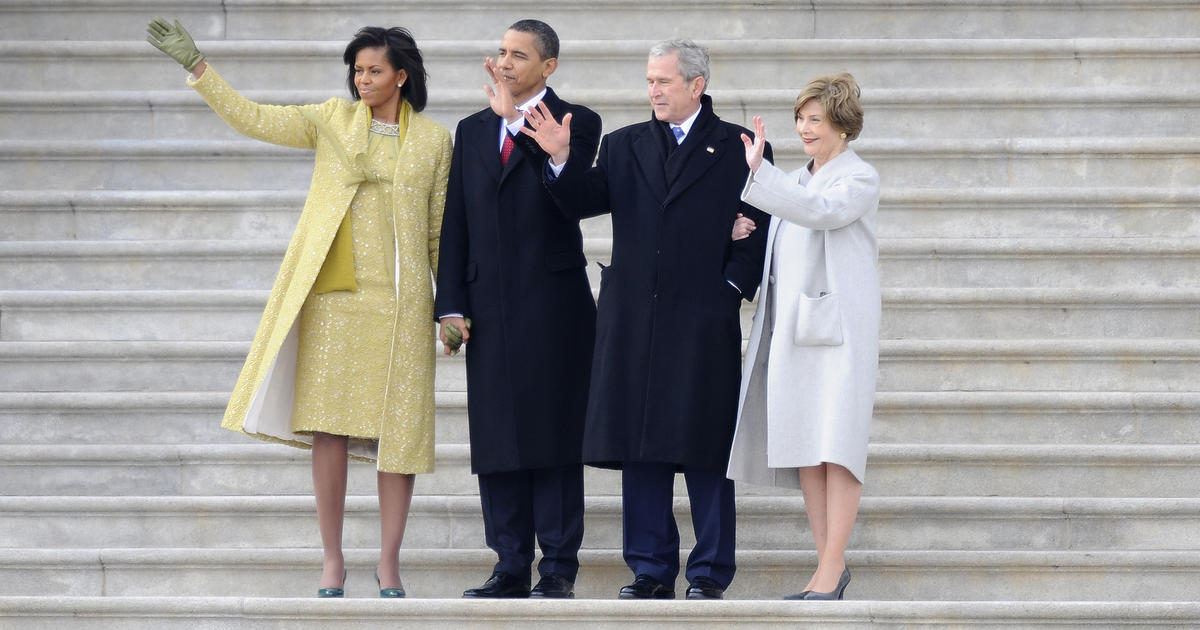

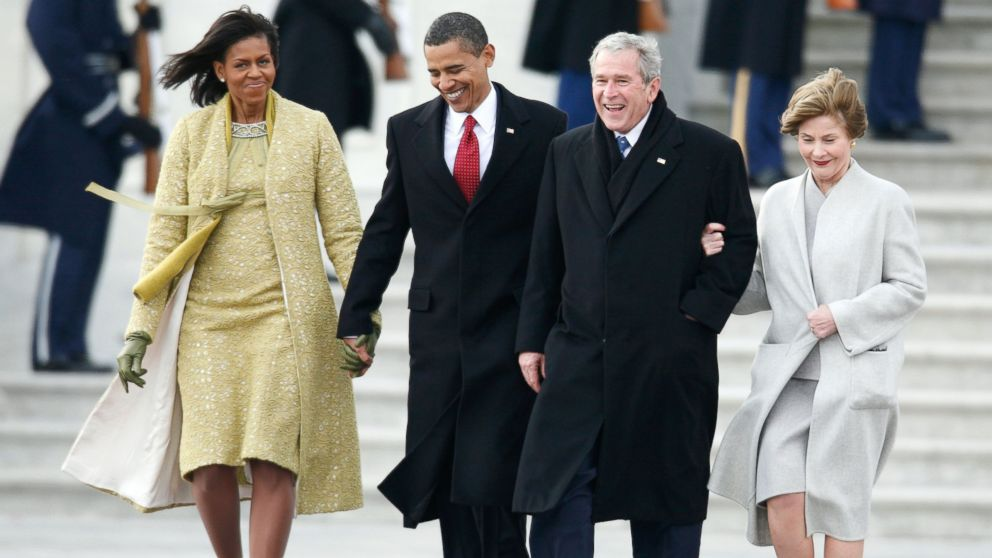

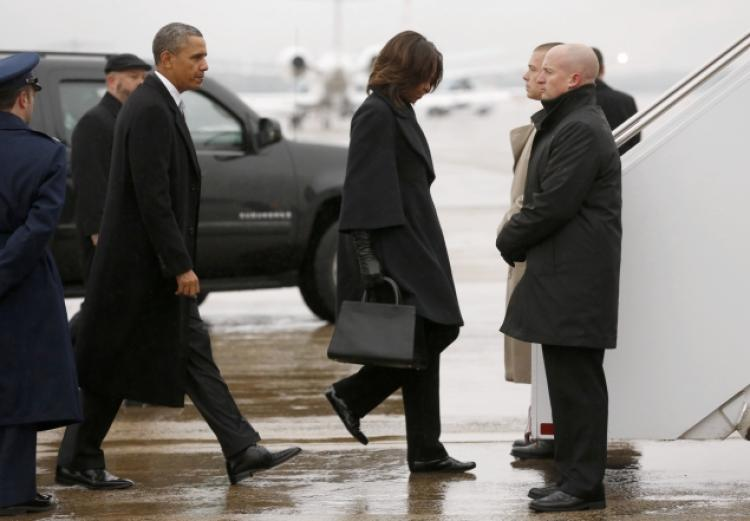

In [38]:
print_similar_images(response)